<a href="https://colab.research.google.com/github/kwasicode/Artificial-Intelligence/blob/main/thermal_power_neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error on Test Set: 18.1208


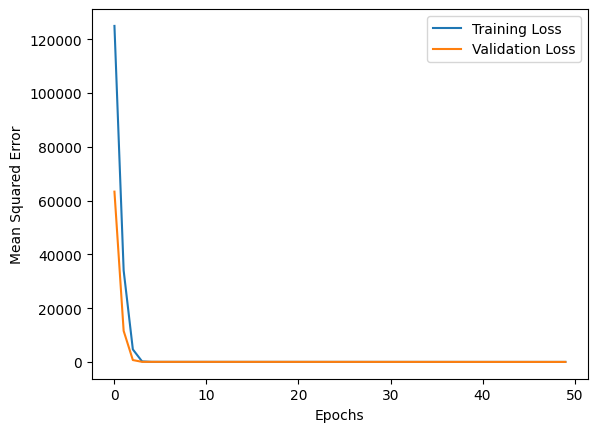

7/7 [==============================] - 0s 2ms/step


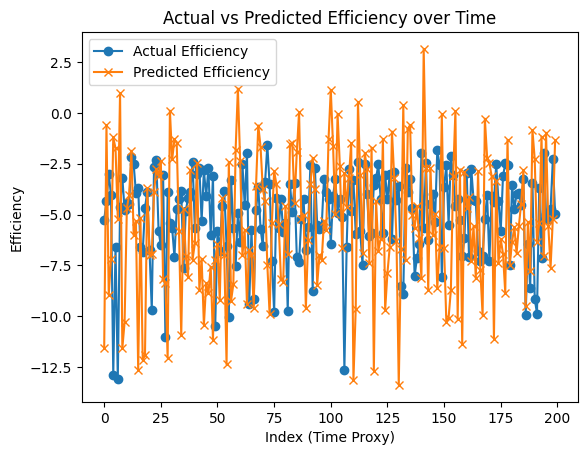

In [2]:
# Import libraries
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Function to calculate efficiency
def calculate_efficiency(T_inlet, T_ambient, P_ratio, Fuel_HV):
    return 1 - (T_inlet / T_ambient) * (1 / P_ratio) * (1 / Fuel_HV)

# Generate synthetic data with noise
np.random.seed(42)
num_samples = 1000
T_inlet = np.random.uniform(800, 1200, num_samples)
T_ambient = np.random.uniform(300, 400, num_samples)
P_ratio = np.random.uniform(10, 20, num_samples)
Fuel_HV = np.random.uniform(0.02, 0.05, num_samples)

efficiency = calculate_efficiency(T_inlet, T_ambient, P_ratio, Fuel_HV)
efficiency_with_noise = efficiency + np.random.normal(0, 0.02, num_samples)

# Split the data into training and testing sets
X = np.column_stack((T_inlet, T_ambient, P_ratio, Fuel_HV))
y = efficiency_with_noise
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Mean Squared Error on Test Set: {loss:.4f}')

# Plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Make predictions using the trained model
predictions = model.predict(X_test)

# Plot predicted vs actual efficiency on a time scale
plt.plot(y_test, label='Actual Efficiency', marker='o')
plt.plot(predictions, label='Predicted Efficiency', marker='x')
plt.xlabel('Index (Time Proxy)')
plt.ylabel('Efficiency')
plt.title('Actual vs Predicted Efficiency over Time')
plt.legend()
plt.show()
